# Time to get your hands dirty! Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope, i.e., errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma = 0.2$.

## Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point:

  $$ p(x_i | \mu, \sigma) $$

- Plot each of the individual likelihoods separately. Also plot their product (i.e., the likelihood of the dataset $\{ x_i \}$). Make sure the x-grid has enough points.
- Just read off the maximum likelihood solution (e.g., using `np.argsort`).
- Compare it with the MLE estimator derived above.

## Part 2

Check the Fisher matrix error estimate makes sense:

- Do a rough second-order differentiation of our log-likelihood function with `np.diff`,
- Divide by our $\Delta \theta^2$ to get the correct normalization,
- Multiply by $-1$,
- Then take the square root:

  $$ \sigma = \sqrt{-\frac{d^2 \log L}{d\theta^2}} $$

- Compare with the Fisher matrix error derived above.
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution.  
  *(The normalization won't be captured; you can rescale it as you like to check that it agrees.)*

## Part 3 (optional)

Let's make our model more realistic. Our $N$ measurements were taken on different nights, where the sky behaved differently (i.e., errors are heteroscedastic). Let's assume that each measurement has a $\sigma_i$ that is normally distributed with:

- Mean: **0.2**
- Standard deviation: **0.05**










In [33]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy.stats import norm
import math

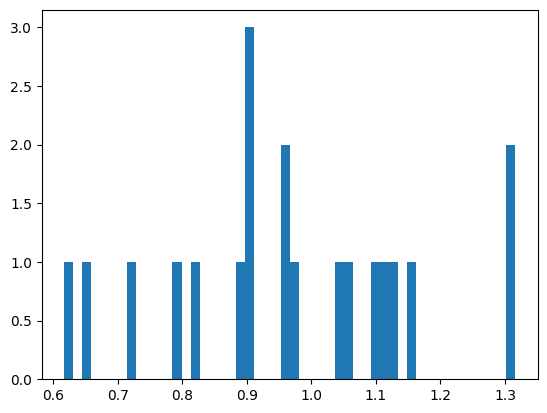

In [34]:
N=20
mu_true=1 # True position of the quasar
sigma=0.2 #Homoscedastic error
np.random.seed(42)
xi= norm(mu_true,sigma).rvs(N) #Generate N measuraments
plt.hist(xi, bins=50)
plt.show()

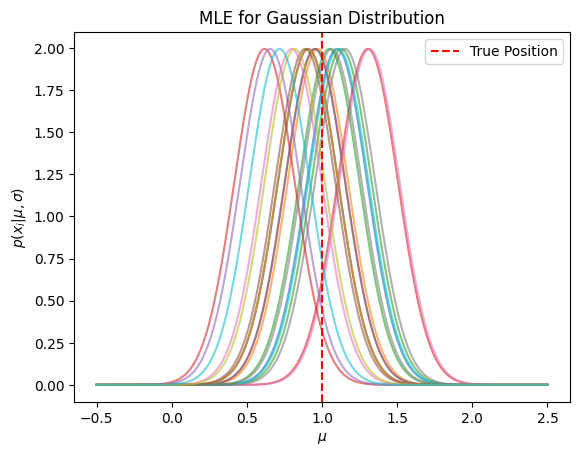

In [35]:
xgrid = np.linspace(-0.5, 2.5, 1000)
likelihoods=[]
# Plot individual likelihoods p(x_i | μ, σ) for each measurement xi
for i in range(N):
    gauss=norm.pdf(xgrid, xi[i], sigma) #Drawing of Gaussians centred on each measurement
    likelihoods.append(gauss)
    plt.plot(xgrid, gauss, alpha=0.6)

plt.axvline(mu_true, color="red", linestyle="--", label="True Position")
plt.legend()
plt.xlabel('$\mu$') 
plt.ylabel(r'$p(x_i|\mu,\sigma)$') 
plt.title('MLE for Gaussian Distribution')
plt.show()


    

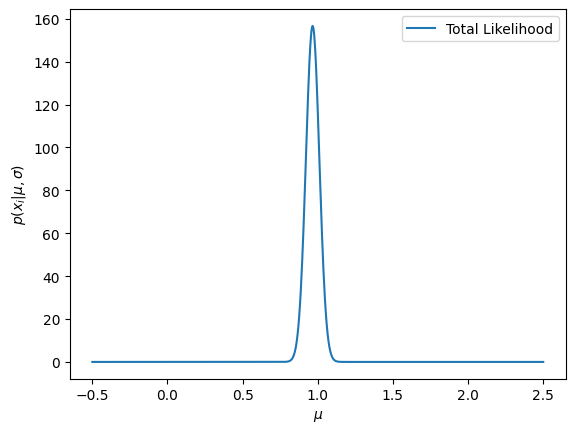

In [36]:
# Compute total likelihood as product of individual Gaussians
likelihood = np.prod(likelihoods, axis=0)  
plt.plot(xgrid, likelihood, label='Total Likelihood')
plt.xlabel('$\mu$') 
plt.ylabel(r'$p(x_i|\mu,\sigma)$') 
plt.legend()
plt.show()

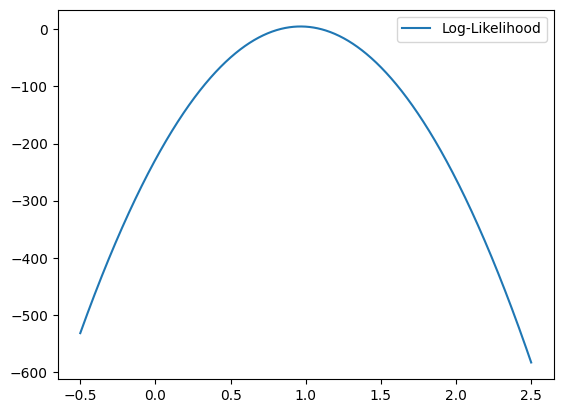

In [37]:
# Calculate log-likelihood 
log_likelihood = np.log(likelihood)
plt.plot(xgrid, log_likelihood, label='Log-Likelihood')
plt.legend()
plt.show()

In [38]:
# Find the μ value where the likelihood is maximum 
sorted_indices = np.argsort(likelihood)
index_max = sorted_indices[-1]
max_value=xgrid[index_max]
print("The maximum of the likelihood is", max_value)
# Compute the MLE estimator for μ using the sample mean
mu_estimator=np.mean(xi)
print("The MLE estimator for μ is", mu_estimator)



The maximum of the likelihood is 0.9654654654654655
The MLE estimator for μ is 0.9657402877116341


In [39]:
derivate=np.diff(log_likelihood,2) # Compute the second derivative of the log-likelihood
dteta=xgrid[1]-xgrid[0] # Normalize by the square of the spacing in the grid
f=-1*derivate/(dteta**2)
mfischer_n=f[index_max] # Extract the Fisher Information at the point of maximum likelihood
sigmamu_n=np.sqrt(1/mfischer_n)
print("Fisher matrix error on estimated mean is ", sigmamu_n)

# Calculate the analytical Fisher information
matrixf_mu=-N/sigma**2
sigmamu=np.sqrt(-1/matrixf_mu)
print("Fisher matrix error ", sigmamu)



Fisher matrix error on estimated mean is  0.04472135954998987
Fisher matrix error  0.0447213595499958


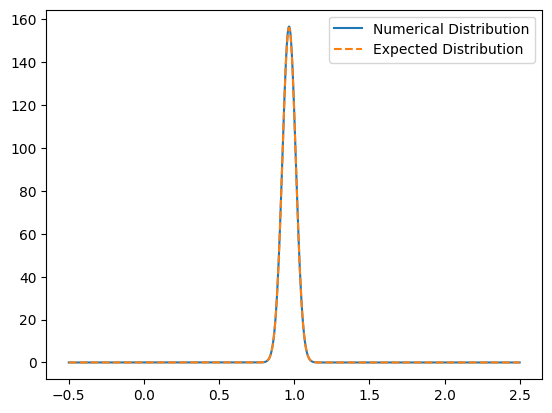

In [40]:
gauss=norm.pdf(xgrid,mu_estimator,sigmamu)
plt.plot(xgrid,likelihood,label="Numerical Distribution", ls='-')
plt.plot(xgrid,17.5*gauss, label="Expected Distribution", ls='dashed') # plot fitted Gaussian with arbitrary normalizing constant
plt.legend()
plt.show()


Generalize the code for heteoscedastic measuraments

In [41]:
N=15
mu_true = 1 # True underlying position of the quasar
mu_s = 0.2 # Mean of the error distribution
sigma_s = 0.05 # Std of the error distribution
np.random.seed(42)
sigmai=np.random.normal(mu_s, sigma_s,N) # Generate heteroscedastic measurement errors
x= [] 
# For each σ_i, draw a measurement from N(μ_true, σ_i)
for s in sigmai:
    sample = norm(mu_true, s).rvs(1)  
    x.append(sample) 

xi= np.concatenate(x)


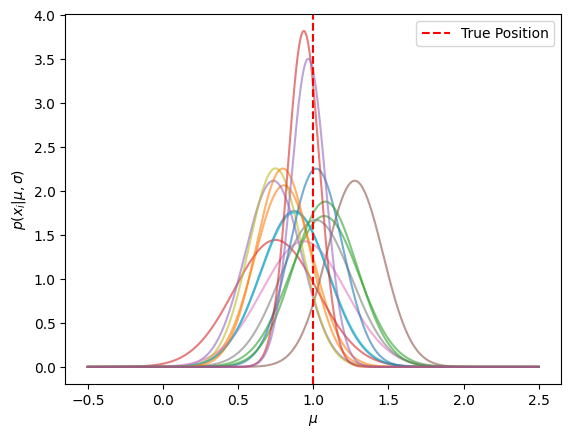

In [42]:
# Plot each individual likelihood p(x_i | μ, σ_i)
Ls = []
for i in range(N):
    gauss=norm.pdf(xgrid, xi[i], sigmai[i]) # Gaussian centered at x_i with std σ_i
    Ls.append(gauss)
    plt.plot(xgrid, gauss, alpha=0.6)

plt.axvline(mu_true, color="red", linestyle="--", label="True Position")
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.show() 


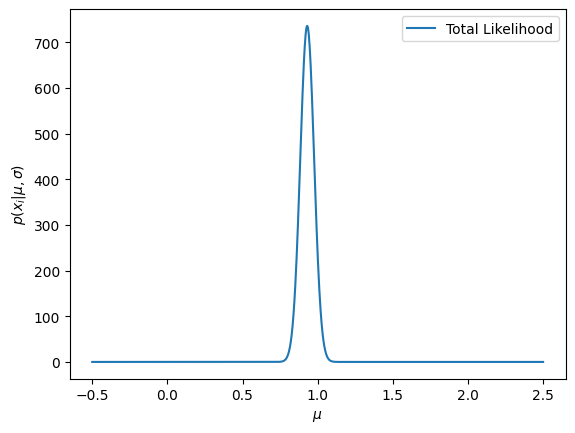

In [43]:
Ls = np.array(Ls)
# Compute total likelihood
likelihood = np.prod(Ls, axis=0)

# Plot total likelihood
plt.plot(xgrid, likelihood, label="Total Likelihood")
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$') 
plt.legend()
plt.show()

In [44]:
sorted_indices = np.argsort(likelihood)
index_max = sorted_indices[-1]
max_value=xgrid[index_max]
print("The maximum of the likelihood is", max_value)
num=np.sum(xi/(sigmai**2))
den=np.sum(1/(sigmai**2))
mu_estimator=num/den
print("The MLE estimator for μ is", mu_estimator)


The maximum of the likelihood is 0.9294294294294294
The MLE estimator for μ is 0.9304398465416676


In [45]:
derivate=np.diff(log_likelihood,2)
dteta=xgrid[1]-xgrid[0]
f=-1*derivate/(dteta**2)
mfischer_n=f[index_max] 
sigmamu_n=np.sqrt(1/mfischer_n)
print("The expected numerical error of μ is ", sigmamu_n)

matrixf_mu=den
sigmamu=np.sqrt(1/matrixf_mu)
print("The expected error of μ is ", sigmamu)


The expected numerical error of μ is  0.04472135955000308
The expected error of μ is  0.04603141693914192


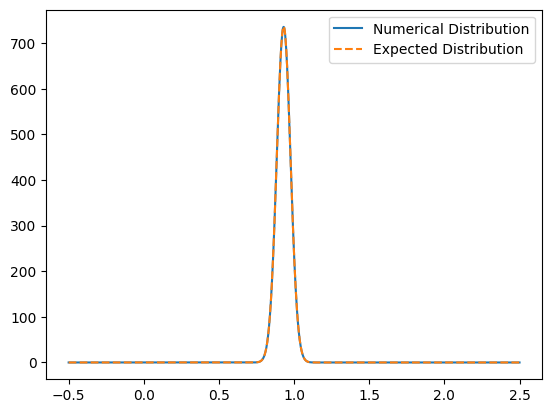

In [46]:
gauss=norm.pdf(xgrid,mu_estimator,sigmamu)
plt.plot(xgrid,likelihood,label="Numerical Distribution")
plt.plot(xgrid,85*gauss, label="Expected Distribution", ls='dashed')
plt.legend()